In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['soykb-chameleon-10fastq-10ch-001.json',
'soykb-chameleon-10fastq-20ch-001.json',
'soykb-chameleon-20fastq-10ch-001.json',
'soykb-chameleon-20fastq-20ch-001.json',
'soykb-chameleon-30fastq-10ch-001.json',
'soykb-chameleon-30fastq-20ch-001.json',
'soykb-chameleon-40fastq-10ch-001.json',
'soykb-chameleon-40fastq-20ch-001.json',
'soykb-chameleon-50fastq-10ch-001.json',
'soykb-chameleon-50fastq-20ch-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/soykb/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

96
156
176
286
256
416
336
546
416
676


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False
num = 5
x = []
y = []
lbs= []
ubs = []
 
naives = []
heur = []
for num_tasks in [10,50,100, 150, 200, 250,300,350,400]:
    counter = 0
    while counter != 10:
        
        seed=random.randint(0, 100000)
        edges = random.randint(2, num_tasks-1)
        num_machines = random.randint(2, num_tasks-1)
        G = random_dag(num_tasks, edges, seed=seed)
    
    
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]

        naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, naive_version=2, iterations=1,verbose=False)
        _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
        d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
        
        # Record data only if solver was successful
        if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:

            x.append(num_tasks)
            heur.append(true)
            naives.append(naive)
            y.append(obj_opt)
            lbs.append(d["objective_task_scaling"])
            ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
            ubs.append(ub)
            counter += 1

        


here
[2.0, 2.0, 1.0, 1.0, 1.0, 2.23606797749979, 1.7320508075688772, 1.0, 1.4142135623730951, 2.23606797749979]
30.342373458883188
apm 104.5.118.159_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           15
   Constants    :            0
   Variables    :          148
   Intermediates:            0
   Connections  :           95
   Equations    :           93
   Residuals    :           93
 
 Number of state variables:            148
 Number of total equations: -          107
 Number of slack variables: -           40
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 ***************************************

Results
0 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
2 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
3 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.70711] Task process time: 1.0
4 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
5 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
Objective: 22.485281244
here
[1.41421356237

Results
0 Speed: [0.99999999999] Ending Time: [2.8189794942] Interval: [1.81898, 2.81898] Task process time: 1.0
1 Speed: [1.7320508076] Ending Time: [1.111872733] Interval: [0.53452, 1.11187] Task process time: 0.57735
2 Speed: [1.0] Ending Time: [2.241629235] Interval: [1.24163, 2.24163] Task process time: 1.0
3 Speed: [1.4142135624] Ending Time: [1.241629245] Interval: [0.53452, 1.24163] Task process time: 0.70711
4 Speed: [1.0] Ending Time: [0.99999998999] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [0.7071067712] Interval: [0.0, 0.70711] Task process time: 0.70711
6 Speed: [1.8708286934] Ending Time: [0.53452247382] Interval: [0.0, 0.53452] Task process time: 0.53452
7 Speed: [1.8708286933] Ending Time: [0.53452247384] Interval: [0.0, 0.53452] Task process time: 0.53452
8 Speed: [1.4142135624] Ending Time: [1.8189795042] Interval: [1.11187, 1.81898] Task process time: 0.70711
9 Speed: [1.0] Ending Time: [1.7071067612] Interval: [0.70711, 1.7071

Results
0 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
1 Speed: [2.2360679775] Ending Time: [0.44721358551] Interval: [0.0, 0.44721] Task process time: 0.44721
2 Speed: [1.4142135624] Ending Time: [1.7316706159] Interval: [1.02456, 1.73167] Task process time: 0.70711
3 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [2.7316706059] Interval: [1.73167, 2.73167] Task process time: 1.0
5 Speed: [1.7320508076] Ending Time: [1.0245638447] Interval: [0.44721, 1.02456] Task process time: 0.57735
6 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [0.99999999999] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
9 Speed: [1.0] Ending Time: [1.4472135755] Interval: [0.44721, 1.44721] Task process t

apm 104.5.118.159_gk_model15 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           21
   Constants    :            0
   Variables    :          265
   Intermediates:            0
   Connections  :          221
   Equations    :          144
   Residuals    :          144
 
 Number of state variables:            265
 Number of total equations: -          164
 Number of slack variables: -           31
 ---------------------------------------
 Degrees of freedom       :             70
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

Results
0 Speed: [1.7320508076] Ending Time: [1.0773502492] Interval: [0.5, 1.07735] Task process time: 0.57735
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.4141835285] Ending Time: [0.70712178835] Interval: [0.0, 0.70712] Task process time: 0.70712
3 Speed: [1.4142435957] Ending Time: [0.70709175476] Interval: [0.0, 0.70709] Task process time: 0.70709
4 Speed: [1.0] Ending Time: [1.7071217784] Interval: [0.70712, 1.70712] Task process time: 1.0
5 Speed: [1.4142135624] Ending Time: [1.7844570204] Interval: [1.07735, 1.78446] Task process time: 0.70711
6 Speed: [1.0] Ending Time: [2.7844570104] Interval: [1.78446, 2.78446] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] Ending Time: [1.7070917448] Interval: [0.70709, 1.70709] Task process time: 1.0
9 Speed: [2.0] Ending Time: [0.49999999001] Interval: [0.0, 0.5] Task process time: 0.5
Objective: 25.9493828

apm 104.5.118.159_gk_model21 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           15
   Constants    :            0
   Variables    :          148
   Intermediates:            0
   Connections  :           95
   Equations    :           93
   Residuals    :           93
 
 Number of state variables:            148
 Number of total equations: -          107
 Number of slack variables: -           40
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

 
 ---------------------------------------------------
 Solver         :  IPOPT (v3.12)
 Solution time  :   0.196599999995669      sec
 Objective      :    104.777809467261     
 Successful solution
 ---------------------------------------------------
 
Results
0 Speed: [0.99999995632] Ending Time: [1.7071067758] Interval: [0.70711, 1.70711] Task process time: 1.0
1 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
2 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
3 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
4 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
5 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
6 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
7 Speed: [1.0] Ending Time: [0.99999999001] Interval: [0.0, 1.0] Task process time: 1.0
8 Speed: [1.0] En

  11  1.2592058e+02 2.37e-09 1.44e-08 -11.0 9.04e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:   1.2592058330401096e+02    1.2592058330401096e+02
Dual infeasibility......:   1.4356842192685017e-08    1.4356842192685017e-08
Constraint violation....:   2.3650865710322933e-09    2.3650865710322933e-09
Complementarity.........:   7.6341081076597612e-10    7.6341081076597612e-10
Overall NLP error.......:   1.4356842192685017e-08    1.4356842192685017e-08


Number of objective function evaluations             = 12
Number of objective gradient evaluations             = 12
Number of equality constraint evaluations            = 12
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 12
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 11
Total CPU secs in IPOPT (w

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0331365e+02 1.40e-06 8.61e-06 -11.0 2.91e-02    -  9.97e-01 9.98e-01h  1
  11  1.0331371e+02 4.63e-12 1.72e-09 -11.0 2.40e-01    -  8.47e-01 1.00e+00h  1

Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:   1.0331370795928913e+02    1.0331370795928913e+02
Dual infeasibility......:   1.7179549073622641e-09    1.7179549073622641e-09
Constraint violation....:   4.6338982511745586e-12    4.6338982511745586e-12
Complementarity.........:   1.2084848235593860e-10    1.2084848235593860e-10
Overall NLP error.......:   1.7179549073622641e-09    1.7179549073622641e-09


Number of objective function evaluations             = 12
Number of objective gradient evaluations             = 12
Number of equality constraint evaluations            = 12
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobia

  11  1.2662231e+02 1.38e+00 3.07e+01  -4.2 1.14e+01    -  7.17e-01 9.49e-01h  1
  12  1.2660521e+02 7.75e-01 1.72e+01  -5.4 9.84e+00    -  6.94e-01 6.75e-01h  1
  13  1.2738743e+02 3.77e-01 7.21e+00  -5.4 7.40e+00    -  7.92e-01 1.00e+00h  1
  14  1.2839728e+02 1.68e-01 2.77e+00  -5.8 3.06e+00    -  9.59e-01 9.58e-01h  1
  15  1.2870684e+02 6.52e-02 9.03e-01  -7.6 8.96e-01    -  8.61e-01 9.15e-01h  1
  16  1.2881676e+02 1.44e-02 1.57e-01  -8.6 3.70e-01    -  9.36e-01 9.87e-01h  1
  17  1.2883949e+02 7.38e-04 6.83e-03  -9.7 4.00e-01    -  9.87e-01 1.00e+00h  1
  18  1.2884050e+02 1.69e-06 2.15e-04 -11.0 1.63e+00    -  8.08e-01 1.00e+00h  1
  19  1.2884050e+02 8.08e-12 1.20e-05 -11.0 8.72e+00    -  9.45e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.2884050e+02 2.84e-14 1.08e-05 -11.0 1.50e+02    -  9.91e-02 1.00e+00h  1
  21  1.2884050e+02 5.68e-14 6.83e-07 -10.9 1.98e+02    -  9.37e-01 1.00e+00h  1

Number of Iterations....: 2

 Number of state variables:           4999
 Number of total equations: -         2698
 Number of slack variables: -          249
 ---------------------------------------
 Degrees of freedom       :           2052
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver ma57.

Number of nonzeros in equality constraint Jacobian...:    12452
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagra

apm 104.5.118.159_gk_model33 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           70
   Constants    :            0
   Variables    :         2149
   Intermediates:            0
   Connections  :         1970
   Equations    :         1129
   Residuals    :         1129
 
 Number of state variables:           2149
 Number of total equations: -         1198
 Number of slack variables: -          126
 ---------------------------------------
 Degrees of freedom       :            825
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model35 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           89
   Constants    :            0
   Variables    :         4147
   Intermediates:            0
   Connections  :         3889
   Equations    :         2158
   Residuals    :         2158
 
 Number of state variables:           4147
 Number of total equations: -         2246
 Number of slack variables: -          205
 ---------------------------------------
 Degrees of freedom       :           1696
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model37 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           68
   Constants    :            0
   Variables    :         2101
   Intermediates:            0
   Connections  :         1768
   Equations    :         1183
   Residuals    :         1183
 
 Number of state variables:           2101
 Number of total equations: -         1250
 Number of slack variables: -          280
 ---------------------------------------
 Degrees of freedom       :            571
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model39 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           63
   Constants    :            0
   Variables    :         1470
   Intermediates:            0
   Connections  :         1263
   Equations    :          807
   Residuals    :          807
 
 Number of state variables:           1470
 Number of total equations: -          869
 Number of slack variables: -          154
 ---------------------------------------
 Degrees of freedom       :            447
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model41 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           62
   Constants    :            0
   Variables    :         1337
   Intermediates:            0
   Connections  :         1162
   Equations    :          725
   Residuals    :          725
 
 Number of state variables:           1337
 Number of total equations: -          786
 Number of slack variables: -          122
 ---------------------------------------
 Degrees of freedom       :            429
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model43 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           77
   Constants    :            0
   Variables    :         2862
   Intermediates:            0
   Connections  :         2677
   Equations    :         1485
   Residuals    :         1485
 
 Number of state variables:           2862
 Number of total equations: -         1561
 Number of slack variables: -          132
 ---------------------------------------
 Degrees of freedom       :           1169
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model45 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          114
   Constants    :            0
   Variables    :         3166
   Intermediates:            0
   Connections  :         2714
   Equations    :         1752
   Residuals    :         1752
 
 Number of state variables:           3166
 Number of total equations: -         1865
 Number of slack variables: -          349
 ---------------------------------------
 Degrees of freedom       :            952
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model47 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          130
   Constants    :            0
   Variables    :         6264
   Intermediates:            0
   Connections  :         5930
   Equations    :         3234
   Residuals    :         3234
 
 Number of state variables:           6264
 Number of total equations: -         3363
 Number of slack variables: -          231
 ---------------------------------------
 Degrees of freedom       :           2670
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model49 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          130
   Constants    :            0
   Variables    :         6307
   Intermediates:            0
   Connections  :         5930
   Equations    :         3277
   Residuals    :         3277
 
 Number of state variables:           6307
 Number of total equations: -         3406
 Number of slack variables: -          274
 ---------------------------------------
 Degrees of freedom       :           2627
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model51 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          170
   Constants    :            0
   Variables    :        14560
   Intermediates:            0
   Connections  :        13970
   Equations    :         7490
   Residuals    :         7490
 
 Number of state variables:          14560
 Number of total equations: -         7659
 Number of slack variables: -          487
 ---------------------------------------
 Degrees of freedom       :           6414
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model53 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          158
   Constants    :            0
   Variables    :        11994
   Intermediates:            0
   Connections  :        11558
   Equations    :         6136
   Residuals    :         6136
 
 Number of state variables:          11994
 Number of total equations: -         6293
 Number of slack variables: -          333
 ---------------------------------------
 Degrees of freedom       :           5368
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model55 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          142
   Constants    :            0
   Variables    :         8889
   Intermediates:            0
   Connections  :         8342
   Equations    :         4647
   Residuals    :         4647
 
 Number of state variables:           8889
 Number of total equations: -         4788
 Number of slack variables: -          444
 ---------------------------------------
 Degrees of freedom       :           3657
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model57 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          193
   Constants    :            0
   Variables    :        19248
   Intermediates:            0
   Connections  :        18593
   Equations    :         9855
   Residuals    :         9855
 
 Number of state variables:          19248
 Number of total equations: -        10047
 Number of slack variables: -          552
 ---------------------------------------
 Degrees of freedom       :           8649
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model59 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          155
   Constants    :            0
   Variables    :        11946
   Intermediates:            0
   Connections  :        10955
   Equations    :         6391
   Residuals    :         6391
 
 Number of state variables:          11946
 Number of total equations: -         6545
 Number of slack variables: -          888
 ---------------------------------------
 Degrees of freedom       :           4513
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model61 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          132
   Constants    :            0
   Variables    :         6823
   Intermediates:            0
   Connections  :         6332
   Equations    :         3591
   Residuals    :         3591
 
 Number of state variables:           6823
 Number of total equations: -         3722
 Number of slack variables: -          388
 ---------------------------------------
 Degrees of freedom       :           2713
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model63 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          196
   Constants    :            0
   Variables    :        19713
   Intermediates:            0
   Connections  :        19196
   Equations    :        10017
   Residuals    :        10017
 
 Number of state variables:          19713
 Number of total equations: -        10212
 Number of slack variables: -          414
 ---------------------------------------
 Degrees of freedom       :           9087
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model65 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          142
   Constants    :            0
   Variables    :         8831
   Intermediates:            0
   Connections  :         8342
   Equations    :         4589
   Residuals    :         4589
 
 Number of state variables:           8831
 Number of total equations: -         4730
 Number of slack variables: -          386
 ---------------------------------------
 Degrees of freedom       :           3715
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model67 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          149
   Constants    :            0
   Variables    :        10102
   Intermediates:            0
   Connections  :         9749
   Equations    :         5153
   Residuals    :         5153
 
 Number of state variables:          10102
 Number of total equations: -         5301
 Number of slack variables: -          250
 ---------------------------------------
 Degrees of freedom       :           4551
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model69 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          127
   Constants    :            0
   Variables    :         5658
   Intermediates:            0
   Connections  :         5327
   Equations    :         2931
   Residuals    :         2931
 
 Number of state variables:           5658
 Number of total equations: -         3057
 Number of slack variables: -          228
 ---------------------------------------
 Degrees of freedom       :           2373
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

apm 104.5.118.159_gk_model71 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          168
   Constants    :            0
   Variables    :        14002
   Intermediates:            0
   Connections  :        13568
   Equations    :         7134
   Residuals    :         7134
 
 Number of state variables:          14002
 Number of total equations: -         7301
 Number of slack variables: -          331
 ---------------------------------------
 Degrees of freedom       :           6370
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

406.8198051533948
apm 104.5.118.159_gk_model73 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          215
   Constants    :            0
   Variables    :        19940
   Intermediates:            0
   Connections  :        19415
   Equations    :        10125
   Residuals    :        10125
 
 Number of state variables:          19940
 Number of total equations: -        10339
 Number of slack variables: -          372
 ---------------------------------------
 Degrees of freedom       :           9229
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

****************************************************************************

392.5603284535191
apm 104.5.118.159_gk_model75 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          286
   Constants    :            0
   Variables    :        41542
   Intermediates:            0
   Connections  :        40786
   Equations    :        21006
   Residuals    :        21006
 


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-a9f492b77d86>", line 19, in <module>
    G = random_dag(num_tasks, edges, seed=seed)
  File "/Users/jannie/scheduling_temp/makespan_energy/construct_graph_util.py", line 37, in random_dag
    if nx.is_directed_acyclic_graph(G):
  File "/opt/anaconda3/lib/python3.7/site-packages/networkx/algorithms/dag.py", line 120, in is_directed_acyclic_graph
    return G.is_directed() and not has_cycle(G)
  File "/opt/anaconda3/lib/python3.7/site-packages/networkx/algorithms/dag.py", line 100, in has_cycle
    consume(topological_sort(G))
  File "/opt/anaconda3/lib/python3.7/site-packages/networkx/utils/misc.py", line 276, in consume
    deque(iterator, maxlen=0)
  File "/opt/anaconda3/lib/python3.7/site-packages/networkx/algorithms/dag.py", line 190, in topological_sort
    indeg

KeyboardInterrupt: 

In [5]:
# naives = [572.8281617409056, 1331.3128540244006, 2051.988186148974, 4908.957570715966, 4427.097315671543, 10722.551392522024, 7706.784325022744, 18780.723094156718, 11887.994968277473, 29080.41842969494, 16967.104097800042, 41618.012251501, 22950.791107151243, 56400.18395313568, 29836.001750405976, 73423.87928867387, 37619.11087992854, 92685.47311048009, 46306.79788927975, 114191.64481211497, 55896.00853253448, 137939.34014765336]
# heurs = [351.14748449053826, 698.6688417479015, 1181.833119651485, 2392.931559303018, 2515.1051913091133, 5128.200522698374, 4320.182955770601, 8876.07384841392, 6602.766119158128, 13562.092685406415, 9411.33279943706, 19356.644767630198, 12670.852536835615, 26103.094518568214, 16404.64052815484, 33831.316526414616, 20688.501817054886, 42685.15172746671, 25668.437288627654, 52905.78716201741, 30587.45634664135, 63200.60308232752]
# y = [300.05921, 586.18851, 10000000, 1637.77108, 1520.32995, 10000000, 2333.07674, 10000000, 3254.04157, 6424.66253, 4271.75539, 10000000, 5377.87606, 10000000, 6565.71298, 12977.19203, 7829.99982, 10000000, 9169.60916, 10000000, 10571.28621, 20904.74224]
print(x)
print(heur)
print(naives)
ratios1 = [n/h for n,h in zip(naives, heur)]
print(ratios1)
ratios2 = [h/true for h, true in zip(heur, y)]
print(ratios2)
ratios3 = [n/true for n, true in zip(naives, y)]
print(ratios3)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 150]
[30.025544467951, 28.877586219651832, 23.98140956982914, 27.779368540961844, 28.984613788532005, 33.52932938976705, 33.52932938976704, 21.65685424949238, 27.246979889987266, 31.79263438494184, 137.50888696288936, 112.42640687119292, 129.98678193263316, 147.40021280344607, 135.40911085736005, 133.51419574707285, 164.5668512162833, 162.193412990628, 167.64664694883524, 120.7106781186549, 415.6688034423064, 296.1908047167506, 296.1908047167505, 289.8278897748174, 292.0407807715677, 304.4944152055022, 277.2697130708513, 247.72068455389777, 307.31321849709866, 240.89904307129868, 387.3293476223162]
[30.342373458883188, 30.313708498984756, 24.129027554137906, 27.74493794711073, 31.082118425709123, 36.78079239113583, 36.81119030894212, 21.464101615137753, 27.2566303550217, 31.775539587463427, 146.8991304576822, 114.31370849898478, 131.40724822837245, 145.8812

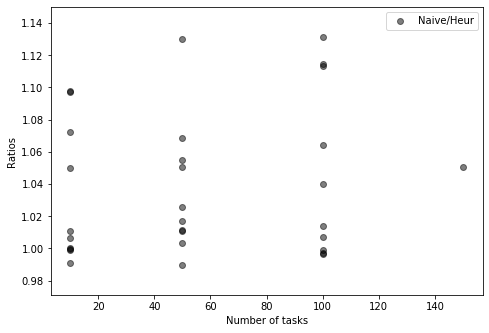

In [6]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
 

# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive/Heur', color='k', alpha = 0.5)
# plt.scatter(x, ratios2, label='Heur/Optimal', color='r', alpha = 0.5)
# plt.scatter(x, ratios3, label='Naive/Optimal', color='b', alpha = 0.5)
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.legend()
plt.show()